# **Netflix Exploratory Data Analysis (EDA)**

#### **Overview:**  
This notebook explores the Netflix_titles dataset available on Kaggle. This dataset includes information about movies and TV shows available on Netflix. Each record includes attributes such as: type, title, director, cast, country, date added, release year, maturity rating, duration, and genres.  


The goal of this EDA is to visualize and uncover patterns/trends within Netflix's entertainment catalog; specifically, focusing on how time periods, genres, and maturity ratings affect content production and target audience decisions.



#### **Objectives:**
- Are there any spikes in certain genres during a specific season or timeframe?
    - Find periods of content oversaturation or strategic release patterns
- What patterns can be observed between maturity ratings and the lifespan of a TV series?
    - Create insights that inform target age groups for future content

<div class="alert alert-block alert-info">
<b>Data Source Preprocessing: </b> The raw dataset was lightly cleaned using SQL queries in Dbeaver. I removed duplicates, handled missing values, and formatted date fields. The cleaned dataset (netflix_titles_cleaned.csv) is imported here to focus on analysis exploration and visualization with Python.

If interested in the how's and why's of data cleaning for this data read through *Clean and Understand the Data with SQLite*.
</div>

## Visualizations with Python

### Setting up the Data

In [1]:
#import necessary packages for visualizations 
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#display graphs and plots inline and not in a new window
%matplotlib inline


#connect to database
connection=sqlite3.connect("db_flix.sqlite")

#check if table already exists 
query="""
SELECT
    name
FROM sqlite_master
WHERE type='table' AND name='db_flix';
"""
table=pd.read_sql(query,connection)

#if table does not exist yet, create it
if table.empty:
    #read csv file
    dataset=pd.read_csv("~/Desktop/SQL_PY/SQL/Netflix Data/netflix_titles_clean.csv")
    #turn dataset into table
    dataset.to_sql('db_flix',connection)
    print("CSV successfully imported into table")

#table exists so just read it
dataset=pd.read_sql('SELECT * FROM db_flix', connection)

#print out total amount of rows and columns
print("Rows: " + str(len(dataset)) + " Columns: " + str(len(dataset.columns)))

#display first 10 rows
query='SELECT * FROM db_flix LIMIT 3'
result=pd.read_sql(query,connection)
display(result)

CSV successfully imported into table
Rows: 8807 Columns: 13


,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,S1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 MIN,Documentaries,"As her father nears the end of his life, filmm..."
1,1,S2,TV SHOW,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 SEASONS,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,S3,TV SHOW,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 SEASON,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [2]:
#change date to consistent date format
dataset['date_added']=pd.to_datetime(dataset['date_added'], errors='coerce')
dataset['date_added']=dataset['date_added'].dt.strftime('%Y-%m-%d')

#update table with new dates
dataset.to_sql('db_flix',connection,if_exists='replace',index=False)
print("Table updated successfully")

Table updated successfully


In [3]:
#check to see if dates changed properly
query='SELECT * FROM db_flix LIMIT 3;'
result=pd.read_sql(query,connection)
display(result)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,S1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,None,United States,2021-09-25,2020,PG-13,90 MIN,Documentaries,"As her father nears the end of his life, filmm..."
1,1,S2,TV SHOW,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 SEASONS,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,S3,TV SHOW,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,2021-09-24,2021,TV-MA,1 SEASON,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


**Summary:** This dataset includes 8807 entries and 13 columns. Out of the 13 columns, the column **date_added** is stored as a string and must be converted to panda's *datetime* for the objective's time-based analysis. There are other columns that have missing values such as **cast** or **director**, but these are not necessary to complete the objectives thus they were left unchanged. So far, only minimal changes were applied using python and pandas as most of the cleaning was done beforehand with SQLite. 

### Genres and Timeframes

#### Total Content Distribution

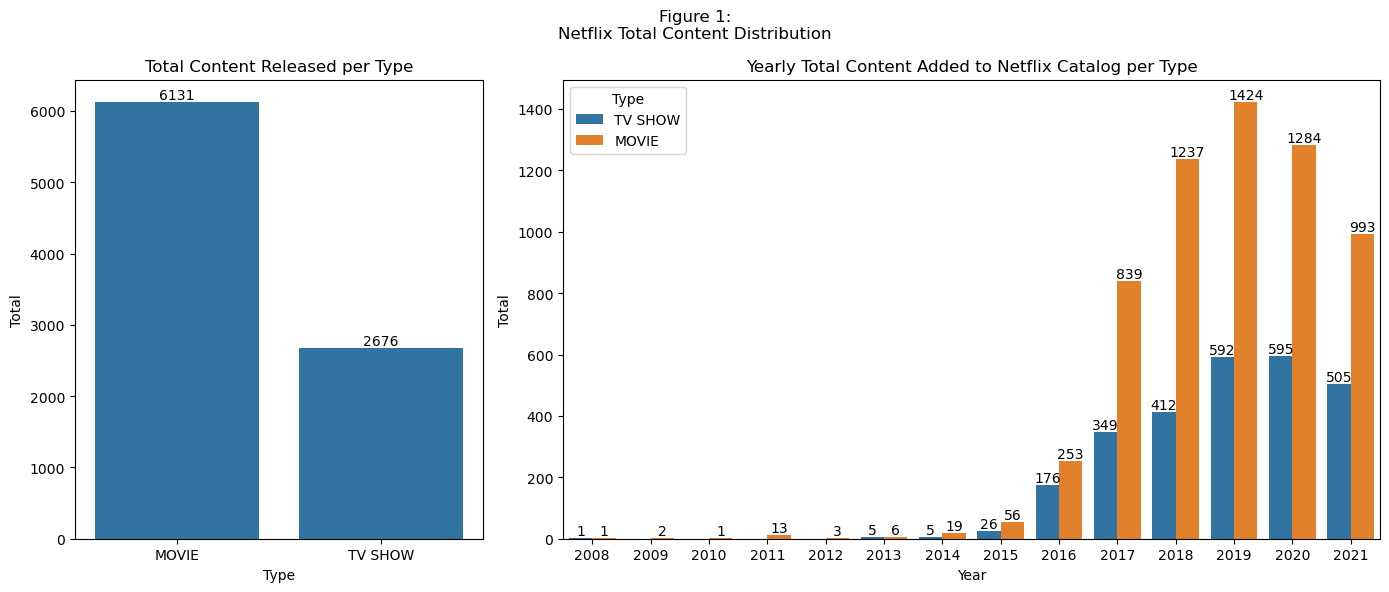

In [4]:
#Graph 1: Total Released for Movies and TV Shows
#create a figure with one row and two columns
fig, axes = plt.subplots(1,2, figsize=(14,6), gridspec_kw={'width_ratios': [1, 2]})
#use seaborn to create bar graph on column named type on left side of figure
graph_bar=sns.countplot(data=dataset, x='type', ax=axes[0])
axes[0].set_title('Total Content Released per Type')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Total')

#display the value counts on each bar
graph_bar.bar_label(graph_bar.containers[0])
    
#Graph 2: Total Released for Movies and TV Shows throughout the years
#check the totals for each year when it was added to netflix
query="""
SELECT
    strftime('%Y',date_added) AS year,
    count(*) as total,
    type
FROM db_flix
GROUP BY year, type
ORDER BY year ASC;
"""
result=pd.read_sql(query,connection)

#use seaborn to create multi-bar graph
graph_bar_years=sns.barplot(data=result, x='year', y='total', hue='type',ax=axes[1])
axes[1].set_title('Yearly Total Content Added to Netflix Catalog per Type')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total')
axes[1].legend(title='Type')

#display the value counts on each bar
for container in graph_bar_years.containers:
    graph_bar_years.bar_label(container)
    
plt.suptitle('Figure 1:\nNetflix Total Content Distribution')
plt.tight_layout()
plt.show()

**Summary:** 

* Graph 1 shows that Netflix releases more movies than tv-shows overall.
* Graph 2 demonstrates that no tv-shows were released onto the Netflix platform for the years: 2009, 2010, 2011, and 2012. A significant gap in content releases, thus confirming Netflix's focus on movie releases.

Additionally, there was a huge spike from the year 2016 to 2017, with a steady increase till 2019 in both tv-shows and movies. Followed by a brief decline in movie releases between 2019 and 2021, which could be due to external factors such as the COVID-19 pandemic and Netflix changing its content strategy due to it.

#### Movies Distribution (Genres)

In [5]:
#method to separate any lists in a column and convert them into their own rows
def separate_rows(dataframe,mycolumn):
    #split the lists inside the column to prep it for explode method
    dataframe[mycolumn]=dataframe[mycolumn].str.split(",")
    #expand the lists in the column into separate rows using pandas explode method
    dataframe = dataframe.explode(mycolumn)
    dataframe[mycolumn]=dataframe[mycolumn].str.strip()
    return dataframe

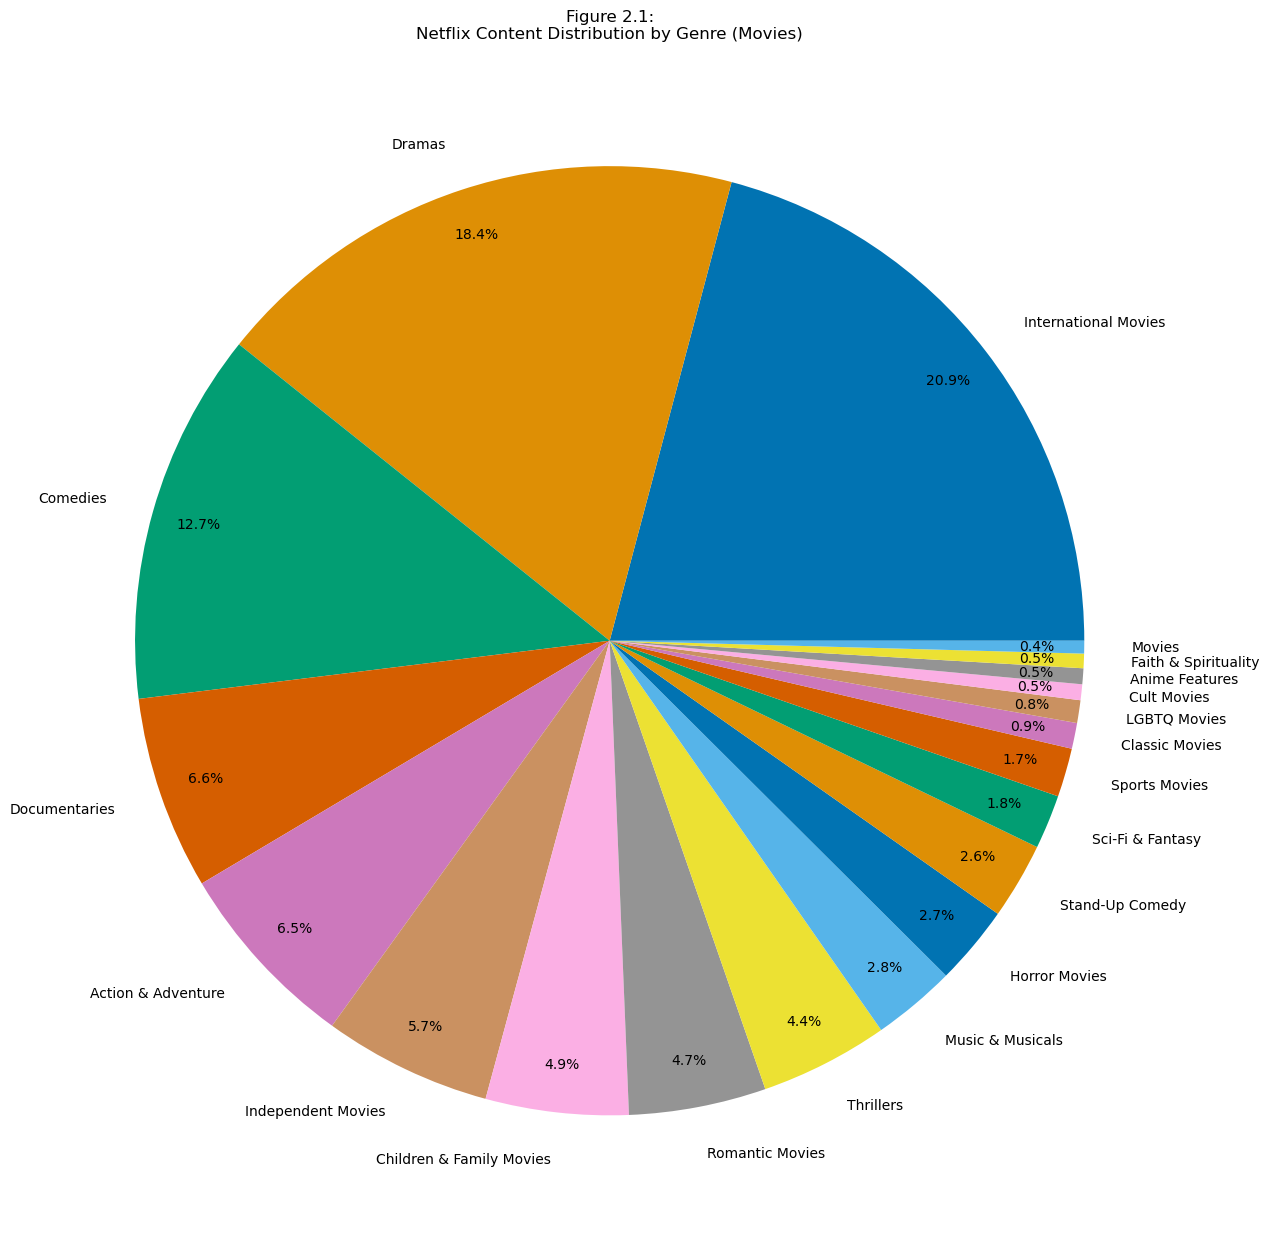

In [6]:
query="""
SELECT
    type,
    listed_in 
FROM db_flix
WHERE type LIKE 'movie';
"""
result=pd.read_sql(query,connection)

#call separate_rows method
result=separate_rows(result,'listed_in')

#count to see most popular genres released for movies
genre_count=result['listed_in'].value_counts()

#set color palette
palette=sns.color_palette('colorblind')
#build pie chart
plt.figure(figsize=(13,13))
plt.pie(genre_count,labels=genre_count.index, autopct='%1.1f%%', pctdistance=0.9, colors=palette)
plt.title('Figure 2.1:\nNetflix Content Distribution by Genre (Movies)')
plt.tight_layout()
plt.show()

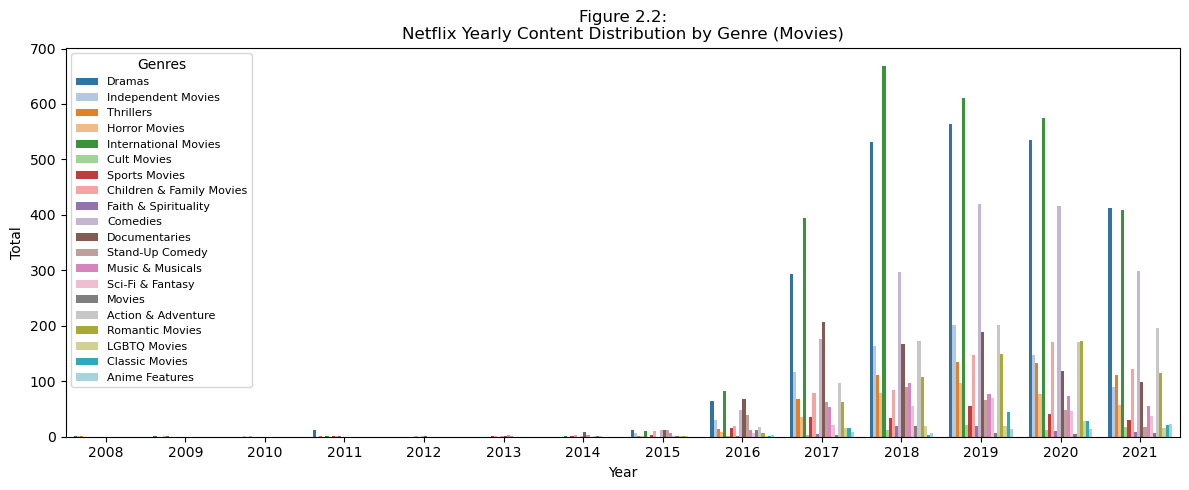

In [7]:
query="""
SELECT
    strftime('%Y',date_added) AS year,
    type,
    listed_in 
FROM db_flix
WHERE type LIKE 'movie'
"""
result=pd.read_sql(query,connection)

#call separate_rows method
result=separate_rows(result,'listed_in')

#count and group by year 
year_genre_count = result.value_counts(['year','listed_in']).reset_index(name='total')
#sort the values on x-axis
year_genre_count = year_genre_count.sort_values(by='year',ascending=True)
#use seaborn to create multi-bar graph
plt.figure(figsize=(12,5))
graph_bar=sns.barplot(data=year_genre_count, x='year', y='total', hue='listed_in',palette='tab20')

plt.title('Figure 2.2:\nNetflix Yearly Content Distribution by Genre (Movies)')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(title='Genres', fontsize=8)
plt.tight_layout()
plt.show()

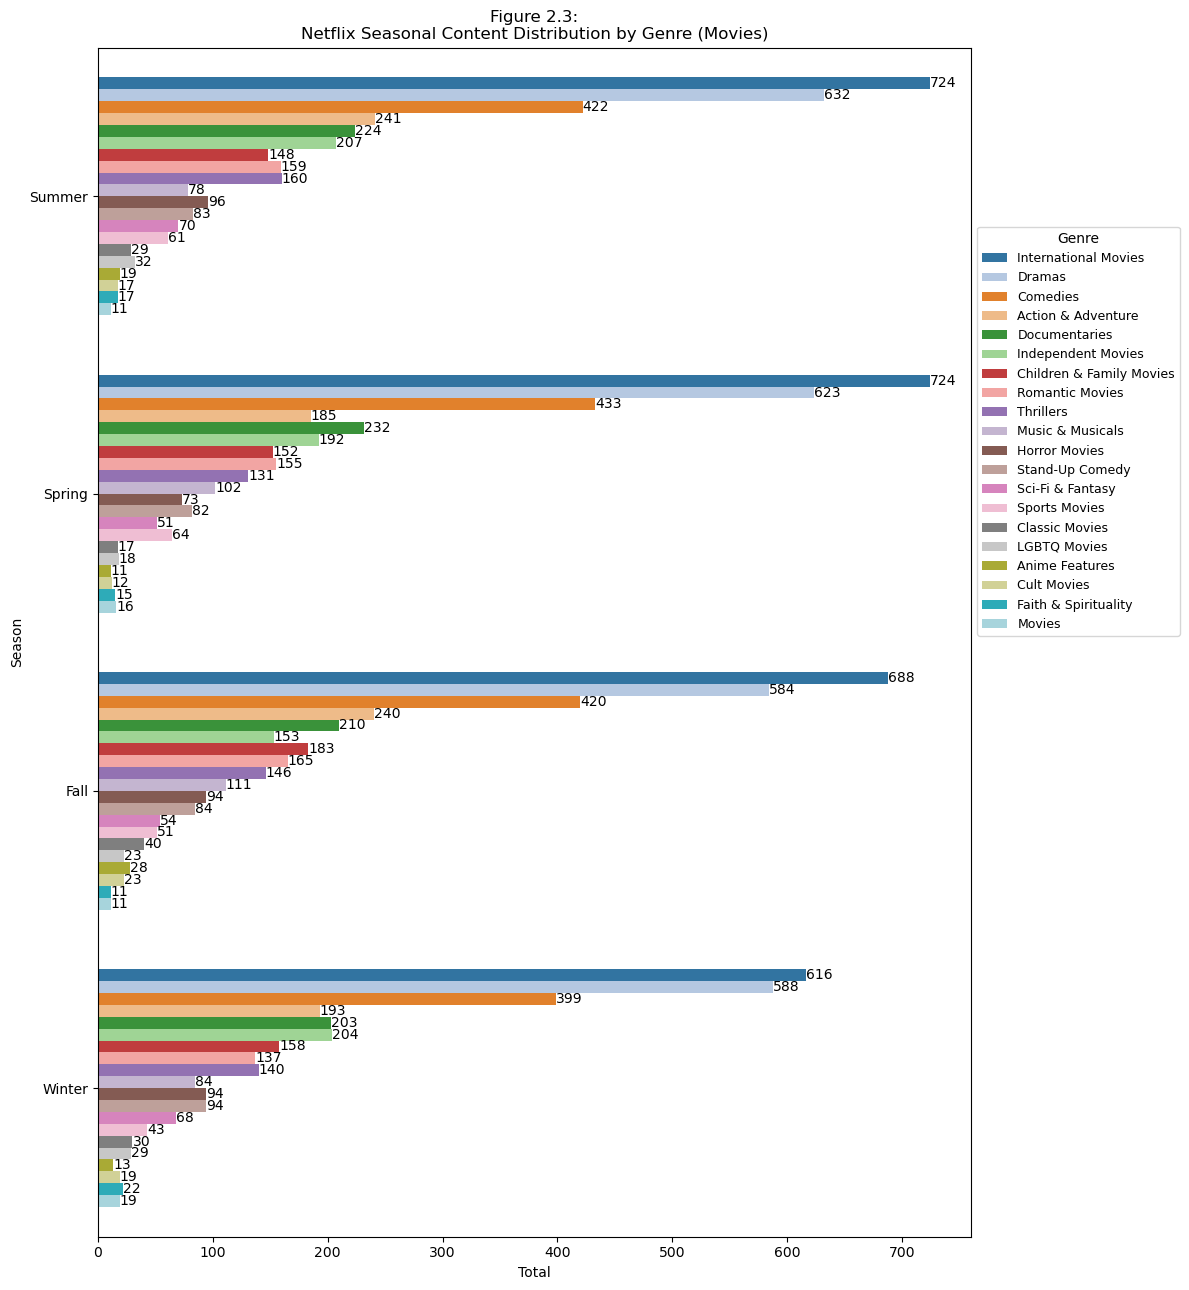

In [8]:
query="""
SELECT
CASE
    WHEN strftime('%m',date_added) IN ('03','04','05') THEN 'Spring'
    WHEN strftime('%m',date_added) IN ('06','07','08') THEN 'Summer'
    WHEN strftime('%m',date_added) IN ('09','10','11') THEN 'Fall'
    WHEN strftime('%m',date_added) IN ('12','01','02') THEN 'Winter'
END AS season,
    type,
    listed_in
FROM db_flix
WHERE type LIKE 'movie'
"""

result=pd.read_sql(query,connection)

#call separate_rows method
result=separate_rows(result,'listed_in')

#count and group by season
genres_by_season = result.value_counts(['season','listed_in']).reset_index(name='total')

#use seaborn to create multi-bar graph
plt.figure(figsize=(12,13))
#graph_bar=sns.barplot(data=genres_by_season, x='season', y='total', hue='listed_in', palette='tab20')
graph_bar=sns.barplot(data=genres_by_season, x='total', y='season', hue='listed_in', palette='tab20')

#display the value counts on each bar
for container in graph_bar.containers:
    graph_bar.bar_label(container)

plt.title('Figure 2.3:\nNetflix Seasonal Content Distribution by Genre (Movies)')
plt.xlabel('Total')
plt.ylabel('Season')
plt.legend(title='Genre', fontsize=9, loc='lower left',bbox_to_anchor=(1.0,0.5))
plt.tight_layout()
plt.show()


**Summary:** The top 3 most popular movie genres released on Netflix are: International, Dramas, and Comedies; the least popular (excluding the generic *movie* genre) are: Faith & Spirituality, Anime Features, and Cult Movies. Over time, certain shifts in genre are noticeable. For example, in 2021, Dramas surpassed International movies in popularity. Also, between 2016 and 2017 documentaries surpassed comedies in terms of releases.

When examining seasonal trends, there are several patterns that stand out beyond the top three genres:
* There is a rise in Action & Adventure releases during **Summer**.
* An increase in Documentaries during **Spring**.
* A resurgence in Action & Adventure during the **Fall** with a short spike in Children & Family movies.
* Head-to-head numbers between Documentaries and Independent movies during **Winter**. 

#### TV Distribution (Genres)

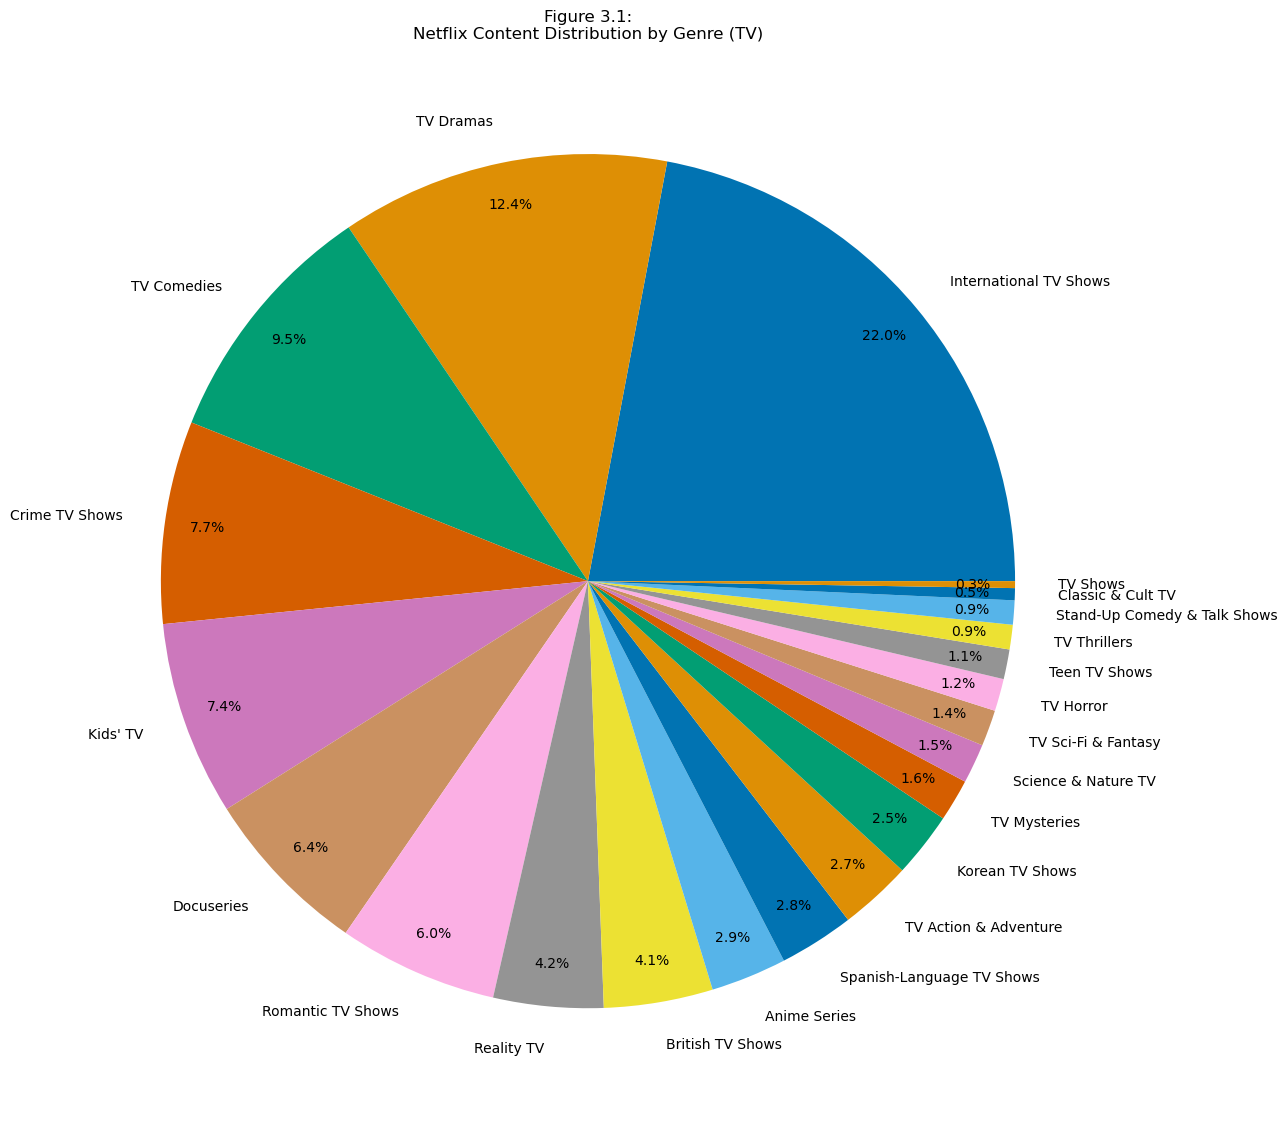

In [9]:
query="""
SELECT
    type,
    listed_in 
FROM db_flix
WHERE type LIKE 'tv show';
"""
result=pd.read_sql(query,connection)

#call separate_rows method
result=separate_rows(result,'listed_in')

#count to see most popular genres for tv shows
genre_count=result['listed_in'].value_counts()

#set color palette
palette=sns.color_palette('colorblind')
#build pie chart
plt.figure(figsize=(13,13))
plt.pie(genre_count,labels=genre_count.index, autopct='%1.1f%%', pctdistance=0.9, colors=palette)
plt.title('Figure 3.1:\nNetflix Content Distribution by Genre (TV)')
plt.tight_layout()
plt.show()


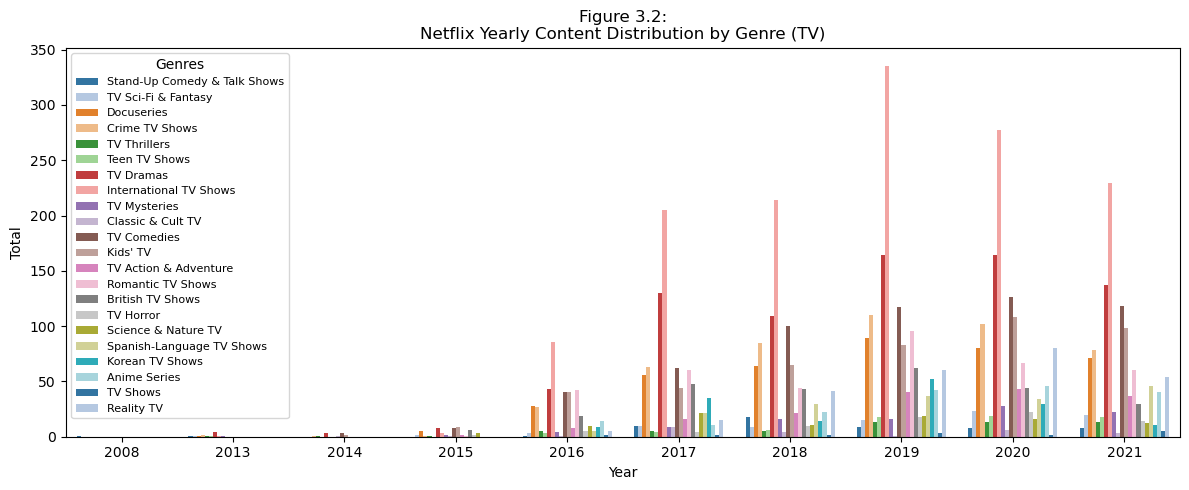

In [10]:
query="""
SELECT
    strftime('%Y',date_added) AS year,
    type,
    listed_in 
FROM db_flix
WHERE type LIKE 'tv show'
"""
result=pd.read_sql(query,connection)

#call separate_rows method
result=separate_rows(result,'listed_in')

#count and group by year 
year_genre_count = result.value_counts(['year','listed_in']).reset_index(name='total')
#sort the values on x-axis
year_genre_count = year_genre_count.sort_values(by='year',ascending=True)
#use seaborn to create multi-bar graph
plt.figure(figsize=(12,5))
graph_bar=sns.barplot(data=year_genre_count, x='year', y='total', hue='listed_in',palette='tab20')

plt.title('Figure 3.2:\nNetflix Yearly Content Distribution by Genre (TV)')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend(title='Genres', fontsize=8)
plt.tight_layout()
plt.show()

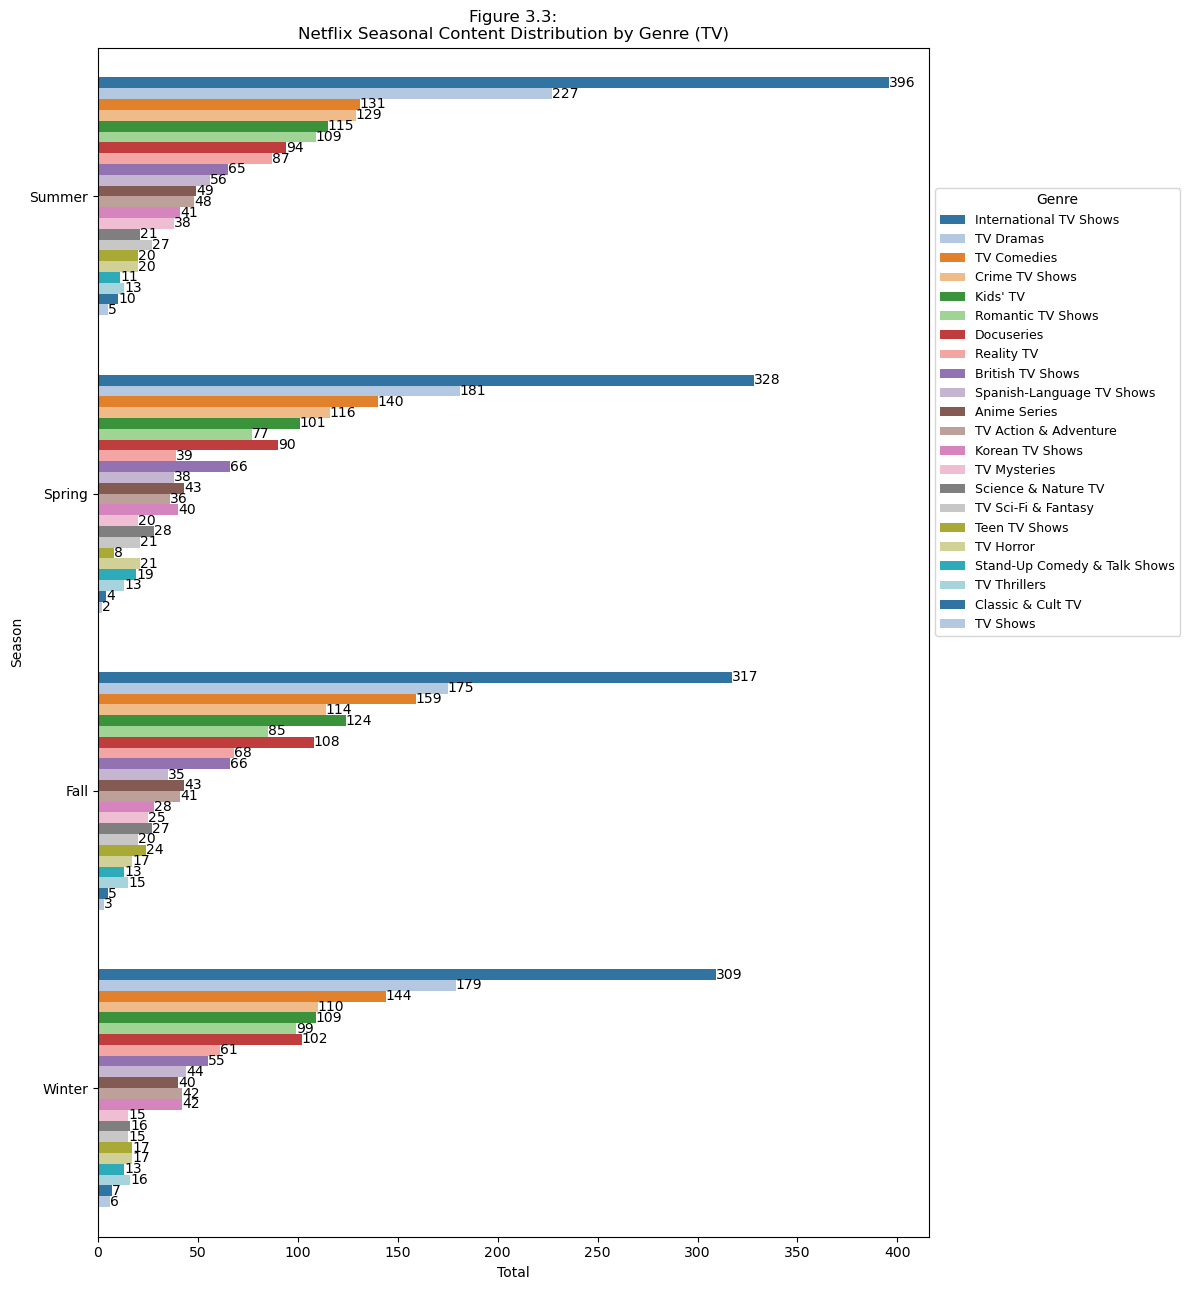

In [11]:
query="""
SELECT
CASE
    WHEN strftime('%m',date_added) IN ('03','04','05') THEN 'Spring'
    WHEN strftime('%m',date_added) IN ('06','07','08') THEN 'Summer'
    WHEN strftime('%m',date_added) IN ('09','10','11') THEN 'Fall'
    WHEN strftime('%m',date_added) IN ('12','01','02') THEN 'Winter'
END AS season,
    type,
    listed_in
FROM db_flix
WHERE type LIKE 'tv show'
"""

result=pd.read_sql(query,connection)

#call separate_rows method
result=separate_rows(result,'listed_in')

#count and group by season
genres_by_season = result.value_counts(['season','listed_in']).reset_index(name='total')

#use seaborn to create multi-bar graph
plt.figure(figsize=(12,13))
graph_bar=sns.barplot(data=genres_by_season, x='total', y='season', hue='listed_in', palette='tab20')

#display the value counts on each bar
for container in graph_bar.containers:
    graph_bar.bar_label(container)
    
plt.title('Figure 3.3:\nNetflix Seasonal Content Distribution by Genre (TV)')
plt.xlabel('Total')
plt.ylabel('Season')
plt.legend(title='Genre', fontsize=9, loc='lower left',bbox_to_anchor=(1.0,0.5))
plt.tight_layout()
plt.show()


**Summary:** The top 3 most popular TV genres released on Netflix are: International, Dramas, and Comedies; the least popular (excluding the generic *TV Shows* genre) are: Classic & Cult TV, Stand-Up Comedy & Talk Shows, and TV Thriller. 

When examining seasonal trends, there are several patterns that stand out beyond the top three genres:
* There is a rise in Crime TV releases during **Summer**.
* Crime TV remains popular througout **Spring** although Reality TV experiences a slight dip.
* An increase of Kids TV being released during **Fall**.
* Three genres close in competition: Crime TV, Kid's TV, and Docuseries during **Winter**. 

### Maturity Ratings and TV Lifespan

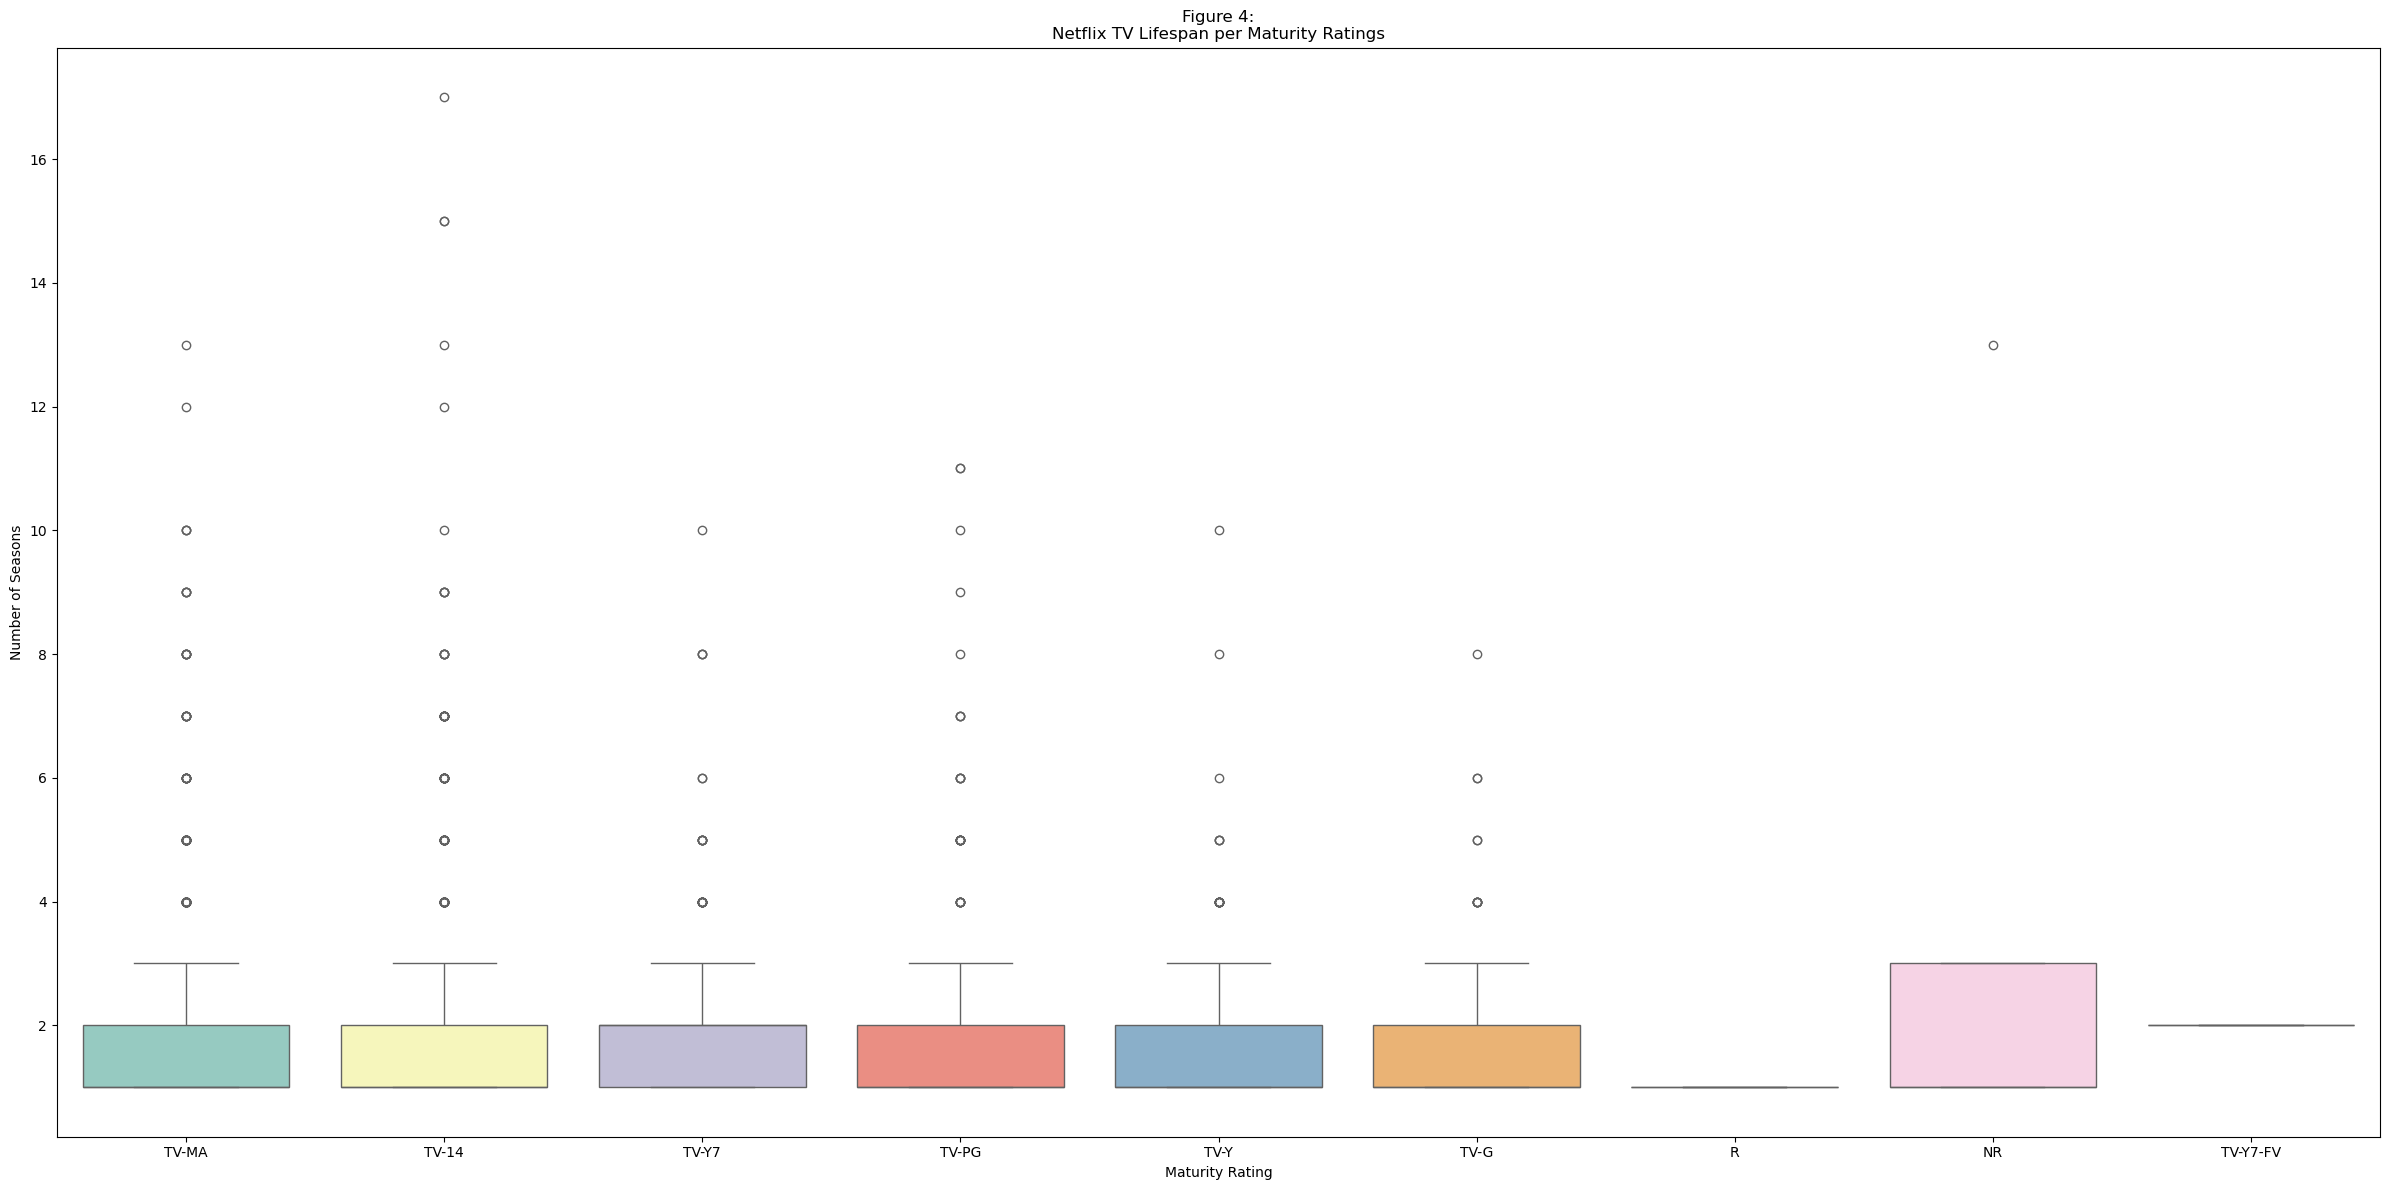

In [12]:
query="""
SELECT
    type,
    rating,
    duration
FROM db_flix
WHERE type LIKE 'tv show'
"""
result=pd.read_sql(query,connection)

#create number duration for sorting
result['num_duration'] = result['duration'].str.extract(r"(\d+)").astype(int)

#use seaborn to create box graph
plt.figure(figsize=(24,12))
sns.boxplot(data=result, x='rating', y='num_duration', hue='rating', palette='Set3', legend=False)

plt.title('Figure 4:\nNetflix TV Lifespan per Maturity Ratings')
plt.xlabel('Maturity Rating')
plt.ylabel('Number of Seasons')
plt.tight_layout()
plt.show()

**Summary:** Most Netflix tv shows last between 1-2 seasons which indicates that Netflix produces or acquires shows with shorter lifespans as there are only a few outliers that go past 2 seasons. Even then, some key insights can be made:  

* TV-MA and TV-14 have the most outliers over 2 seasons. These categories likely have higher engagement or stronger fanbases and/or are renewed often.
* R-Rated shows last 1 season or less. This shows that Netflix rarely acquires or produces R-Rated content as any show labeled 'R' does not continue past its initial season.

Overall, Netflix's strategy appears to prioritze broader audience categories (TV-MA, TV-14, TV-PG) which capture mainstream and mature viewers without entering the limited R-Rated category. This strategy likely creates a balance between mass appeal and mature themes which sustains Netflix's longterm content plan.

## Clean and Understand the Data with SQLite<a class="anchor" id="1"></a>

<div class="alert alert-block alert-info">
<b>SQLite Limitations:</b> Keep in mind, SQLite has certain limitations regarding stored procedures and looping. Some of these steps may seem tedious or redundant, but I assure you that I have done my due diligence at researching faster, easier, and readible ways around these limitations (if at all possible).

I could have chosen MySQL or PostgreSQL, but for this small-scale project I believed SQlite would work best. 
</div>

### Empty Values<a id="2"></a>

**Goal(s)**
1. Check if any columns contain empty values
2. Check how those empty values are stored: true NULLS or empty strings
3. Convert all empty values to NULLS for consistency and easier data exploration

<b><font color='red'>QUERY 1: The query below will output a list of SQL quieres that follow a specific format so it can be used for the next step of data cleaning. </font></b>


``` SQL
--use printf to make sure output keeps its formatting & keep this query readible
SELECT
	printf(
--%s will be replaced with value from pragma_table_info
		'SELECT
		''%s'' AS column_title,
		COUNT(*) AS total_rows,
		SUM("%s" IS NULL) AS null_count,
		SUM("%s" = '''') AS empty_string_count
		FROM netflix_titles;',
--replace %s with value name: dataset column name
		prag.name,
		prag.name,
		prag.name
	) AS new_sql_code
--gather column info from dataset
FROM
	pragma_table_info('netflix_titles') AS prag;
```


**Sample Output: QUERY 2**
```SQL
--for column 1
SELECT
    'show_id' AS column_title,
    COUNT(*) AS total_rows,
    SUM("show_id" IS NULL) AS null_count,
    SUM("show_id" = '') AS empty_string_count
FROM
    netflix_titles;
--for column 2
SELECT
    'type' AS column_title,
    COUNT(*) AS total_rows,
    SUM("type" IS NULL) AS null_count,
    SUM("type" = '') AS empty_string_count
FROM
    netflix_titles;
--for column 3
SELECT
    'title' AS column_title,
    COUNT(*) AS total_rows,
    SUM("title" IS NULL) AS null_count,
    SUM("title" = '') AS empty_string_count
FROM
    netflix_titles;
--pattern continues for all the columns in the table
```

<b><font color='red'>Gather Info: Use Query 2 (the output of Query 1) to gather information about the empty values in each column in the dataset. After running the sql script we get information like this: </font></b>

**Output:**

``` SQL
--results 1 (3)
column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
title       |      8807|         0|                 0|

--results 1 (4)
column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
director    |      8807|         0|              2634|

--results 1 (5)
column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
cast        |      8807|         0|               825|

--pattern continues for all the columns in the table
```


With this information, we can see how empty values are stored within the dataset. These empty values are stored as empty strings. We will convert them to true NULLs to make parsing our data easier and create a faster, more consistent, workflow.

The columns we need to convert to NULL values are: **director**, **cast**, **country**, **date_added**, **rating**, and **duration**

<b><font color='red'>Empty Strings to NULL: Update the dataset to permanentely show empty strings as NULLs for those columns. </font></b>

``` SQL
UPDATE
    netflix_titles
SET
    director = NULLIF(director,''),
    "cast" = NULLIF("cast",''),
    country = NULLIF(country,''),
    date_added = NULLIF(date_added,''),
    rating = NULLIF(rating,''),
    duration = NULLIF(duration,'');

--change empty strings to NULL completed
```

Check if completed correctly: 
``` SQL
column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
director    |      8807|      2634|                 0|

column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
cast        |      8807|       825|                 0|

column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
country     |      8807|       831|                 0|

column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
date_added  |      8807|        10|                 0|

column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
rating      |      8807|         4|                 0|

column_title|total_rows|null_count|empty_string_count|
------------+----------+----------+------------------+
duration    |      8807|         3|                 0|
```

**Yes. Completed correctly.**

### Duplicate Values<a id="3"></a>

**Goal(s)**
1. Check if there are duplicates in columns: show_id, title, and description.
2. Remove duplicate values (if any).

<b><font color='red'>QUERY 1: The query below will output any duplicates found. </font></b>

```SQL
SELECT
	show_id,
	title,
	description,
	COUNT(*) as counts
FROM
	netflix_titles
GROUP BY 
	show_id,
	title,
	description
HAVING
	COUNT(*)>1
ORDER BY
	show_id;
```

There is no output. Therefore, **no duplicates** to worry about.

### Inconsistent Date Formats<a id="4"></a>

**Goal(s)**
1. Standarize the dates on column: date_added

<b><font color='red'>QUERY 1: The query below will help me analyze the date_added column further to see what changes need to be made before updating the format.

Note: Limited entries for faster data performance. </font></b>

```SQL
--select distinct values
SELECT DISTINCT
    date_added
FROM
    netflix_titles
--group any identical dates into one
GROUP BY
    date_added
--limit results by 200
LIMIT
    200;
```

Looking at the results, I can see I need to (1) remove trailing and leading white space and (2) change this specific format **Month Day , Year**

<b><font color='red'>QUERY 2: The query below will select the dates, remove leading/trailing whitespaces, and convert them to the standard date format.

Note: This is just a select statement to see if we are doing it correctly before we commit changes. </font></b>

```SQL
--select distinct values
SELECT DISTINCT
--follows pattern replace(replace(case statements,',',''),' ','')
replace(
	replace(
--case statments give new strings for date_added in the pattern MM/DD, YYYY
		CASE
			WHEN
				date_added LIKE '%January%' THEN replace(TRIM(date_added),'January','01/')
			WHEN
				date_added LIKE '%February%' THEN replace(TRIM(date_added),'February','02/')
			WHEN
				date_added LIKE '%March%' THEN replace(TRIM(date_added),'March','03/')
			WHEN
				date_added LIKE '%April%' THEN replace(TRIM(date_added),'April','04/')
			WHEN
				date_added LIKE '%May%' THEN replace(TRIM(date_added),'May','05/')
			WHEN
				date_added LIKE '%June%' THEN replace(TRIM(date_added),'June','06/')
			WHEN
				date_added LIKE '%July%' THEN replace(TRIM(date_added),'July','07/')
			WHEN
				date_added LIKE '%August%' THEN replace(TRIM(date_added),'August','08/')
			WHEN
				date_added LIKE '%September%' THEN replace(TRIM(date_added),'September','09/')
			WHEN
				date_added LIKE '%October%' THEN replace(TRIM(date_added),'October','10/')
			WHEN
				date_added LIKE '%November%' THEN replace(TRIM(date_added),'November','11/')
			WHEN
				date_added LIKE '%December%' THEN replace(TRIM(date_added),'December','12/')
			ELSE 
				date_added
		END,
--inner replace takes the new string from case statements: MM/DD, YYYY and replaces commas with '/'
	',','/')
--outer replace takes our newest string MM/DD/ YYYY and removes any spaces giving us MM/DD/YYYY
,' ','') AS new_dates
FROM
netflix_titles
GROUP BY
date_added
LIMIT 200;
```

<div class="alert alert-block alert-info">
<b>Final Decision:</b> Just checked and saw that Pandas to_datetime() accepts strings written in the format 'MONTH DD, YYYY' so I don't have to change this dataset to another format like MM/DD/YYYY to use it.

I decided to keep this in the EDA as my thought process (plus it hurts to delete).
</div>

### Consistent Fields<a id="5"></a>

**Goal(s)**
1. Turn categorical fields into uppercase
2. Trim the fields, remove unnecessary whitespace

<b><font color='red'>QUERY 1: The query below will trim and convert the necessary fields into uppercase</font></b>

```SQL
UPDATE netflix_titles
SET
--trim and convert to uppercase the categorical fields
	show_id = TRIM(UPPER(show_id)),
	"type" = TRIM(UPPER("type")),
	rating = TRIM(UPPER(rating)),
	duration = TRIM(UPPER(duration)),
--just trim everything else to keep readability
	listed_in = TRIM(listed_in),
	title = TRIM(title),
	director = TRIM(director),
	"cast" = TRIM("cast"),
	country = TRIM(country),
	date_added = TRIM(date_added),
	release_year = TRIM(release_year),
	description = TRIM(description);
```

<div class="alert alert-block alert-success">
<b>Lite Cleaning with SQLite:</b> We have successfully finished the light cleanup to make visualizations easier. 
</div>